Twitter Dataset - Preprocessing
1. Add the cleaned (after removal of URLs, Mentions) tweets to a new column
named with ‘new’.
2. Remove hyperlinks, Twitter marks and styles
3. Tokenization — Tokenize the given Strings
4. Stemming - Reducing the Size of vocabulary.

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [1]:
from google.colab import files
uploaded=files.upload()


Saving train.csv to train.csv


In [4]:
df=pd.read_csv("train.csv")
df=df.drop(labels=["id","label"],axis=1)
df.head()


tweet
0   @user when a father is dysfunctional and is s...
1  @user @user thanks for #lyft credit i can't us...
2                                bihday your majesty
3  #model   i love u take with u all the time in ...
4             factsguide: society now    #motivation

In [10]:
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt
  

Removing links

In [11]:
df['new']=np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()


tweet                                                new
0   @user when a father is dysfunctional and is s...    when a father is dysfunctional and is so sel...
1  @user @user thanks for #lyft credit i can't us...    thanks for #lyft credit i can't use cause th...
2                                bihday your majesty                                bihday your majesty
3  #model   i love u take with u all the time in ...  #model   i love u take with u all the time in ...
4             factsguide: society now    #motivation             factsguide: society now    #motivation

In [13]:
df['new'] = df['new'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

tweet                                                new
0   @user when a father is dysfunctional and is s...  when father dysfunctional selfish drags kids i...
1  @user @user thanks for #lyft credit i can't us...  thanks #lyft credit can't cause they don't off...
2                                bihday your majesty                                bihday your majesty
3  #model   i love u take with u all the time in ...  #model love take with time urð±!!! ððð...
4             factsguide: society now    #motivation                    factsguide: society #motivation

REMOVE HYPERLINKS ,TWITS MARKS AND STYLES

In [8]:
df['new'] =df['new'].str.replace("[^a-zA-Z]", " ")
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


tweet                                                new
0   @user when a father is dysfunctional and is s...  when father dysfunctional selfish drags kids i...
1  @user @user thanks for #lyft credit i can't us...  thanks  lyft credit can t cause they don t off...
2                                bihday your majesty                                bihday your majesty
3  #model   i love u take with u all the time in ...   model love take with time ur                 ...
4             factsguide: society now    #motivation                    factsguide  society  motivation

TOKENIZATION

In [16]:
import nltk
nltk.download('punkt')
tf=pd.DataFrame()
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
tf['tokens']=df['new'].apply(lambda x: word_tokenize(x.lower()))
tf.head()


tokens
0  [when, father, dysfunctional, selfish, drags, ...
1  [thanks, #, lyft, credit, ca, n't, cause, they...
2                            [bihday, your, majesty]
3  [#, model, love, take, with, time, urð±, !, ...
4            [factsguide, :, society, #, motivation]

LEMMATIZATION

In [21]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tf['tokens'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tf.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


tokens
0  [when, father, dysfunctional, selfish, drags, ...
1  [thanks, #, lyft, credit, ca, n't, cause, they...
2                            [bihday, your, majesty]
3  [#, model, love, take, with, time, urð±, !, ...
4            [factsguide, :, society, #, motivation]

STEMMING

In [18]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tf['tokens']=tf['tokens'].apply(lambda x: [stemmer.stem(i) for i in x])
tf.head()

tokens
0  [when, father, dysfunct, selfish, drag, kid, i...
1  [thank, #, lyft, credit, ca, n't, caus, they, ...
2                            [bihday, your, majesti]
3  [#, model, love, take, with, time, urð±, !, ...
4                  [factsguid, :, societi, #, motiv]

LEMMATIZATION


In [19]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tf['tokens'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tf.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


tokens
0  [when, father, dysfunct, selfish, drag, kid, i...
1  [thank, #, lyft, credit, ca, n't, caus, they, ...
2                            [bihday, your, majesti]
3  [#, model, love, take, with, time, urð±, !, ...
4                  [factsguid, :, societi, #, motiv]

REMOVAL OF STOP WORDS

In [22]:
import nltk
nltk.download('punkt')
tf=pd.DataFrame()
from nltk.tokenize import word_tokenize
tf['tokens']=df['new'].apply(lambda x: word_tokenize(x.lower()))
tf.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


tokens
0  [when, father, dysfunctional, selfish, drags, ...
1  [thanks, #, lyft, credit, ca, n't, cause, they...
2                            [bihday, your, majesty]
3  [#, model, love, take, with, time, urð±, !, ...
4            [factsguide, :, society, #, motivation]

In [23]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tf['tokens']=tf['tokens'].apply(lambda x: [stemmer.stem(i) for i in x])
tf.head()

tokens
0  [when, father, dysfunct, selfish, drag, kid, i...
1  [thank, #, lyft, credit, ca, n't, caus, they, ...
2                            [bihday, your, majesti]
3  [#, model, love, take, with, time, urð±, !, ...
4                  [factsguid, :, societi, #, motiv]

In [15]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tf['tokens'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tf.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


tokens
0  [when, father, dysfunct, selfish, drag, kid, i...
1  [thank, lyft, credit, can, t, caus, they, don,...
2                            [bihday, your, majesti]
3                [model, love, take, with, time, ur]
4                        [factsguid, societi, motiv]

In [27]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tf['tokens']=tf['tokens'].apply(lambda x: [ i for i in x if(i not in stop_words)])
tf.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


tokens
0  [father, dysfunct, selfish, drag, kid, dysfunc...
1  [thank, #, lyft, credit, ca, n't, caus, n't, o...
2                                  [bihday, majesti]
3  [#, model, love, take, time, urð±, !, !, !, ...
4                  [factsguid, :, societi, #, motiv]

In [28]:
tf['tokens']=tf['tokens'].apply(lambda x:' '.join([w for w in x if len(w)>3]))
tf.head()

tokens
0              father dysfunct selfish drag dysfunct
1  thank lyft credit caus offer wheelchair disapo...
2                                     bihday majesti
3  model love take time urð± ðððð ð...
4                            factsguid societi motiv

In [29]:
tf=tf.replace('',np.NaN)
tf.dropna(axis=0,inplace=True)
tf.head()


tokens
0              father dysfunct selfish drag dysfunct
1  thank lyft credit caus offer wheelchair disapo...
2                                     bihday majesti
3  model love take time urð± ðððð ð...
4                            factsguid societi motiv

In [30]:
from nltk.tokenize import word_tokenize
tokens=[]
for i in list(tf.loc[:,'tokens']):
  tokens+=word_tokenize(i)
print(tokens)

['father', 'dysfunct', 'selfish', 'drag', 'dysfunct', 'thank', 'lyft', 'credit', 'caus', 'offer', 'wheelchair', 'disapoint', 'getthank', 'bihday', 'majesti', 'model', 'love', 'take', 'time', 'urð\x9f\x93±', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦', 'factsguid', 'societi', 'motiv', 'huge', 'fare', 'talk', 'befor', 'leav', 'chao', 'disput', 'allshowandnogo', 'camp', 'tomorrow', 'dannyâ\x80¦', 'next', 'school', 'year', 'year', 'exams.ð\x9f\x98¯', 'think', 'ð\x9f\x98\xad', 'school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl', 'love', 'land', 'allin', 'champion', 'cleveland', 'clevelandcavali', 'welcom', 'ireland', 'consum', 'price', 'index', 'climb', 'previou', 'blog', 'silver', 'gold', 'forex', 'selfish', 'orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love', 'daddi', 'today', '80day', 'gettingf', 'call', 'michigan', 'middl', 'school', "'build", 'wall', 'chant',

In [31]:
from nltk.tokenize import word_tokenize
tokens=[]
for i in list(tf.loc[:,'tokens']):
  tokens+=word_tokenize(i)


In [38]:
print(tokens)

['father', 'dysfunct', 'selfish', 'drag', 'dysfunct', 'thank', 'lyft', 'credit', 'caus', 'offer', 'wheelchair', 'disapoint', 'getthank', 'bihday', 'majesti', 'model', 'love', 'take', 'time', 'urð\x9f\x93±', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦', 'factsguid', 'societi', 'motiv', 'huge', 'fare', 'talk', 'befor', 'leav', 'chao', 'disput', 'allshowandnogo', 'camp', 'tomorrow', 'dannyâ\x80¦', 'next', 'school', 'year', 'year', 'exams.ð\x9f\x98¯', 'think', 'ð\x9f\x98\xad', 'school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl', 'love', 'land', 'allin', 'champion', 'cleveland', 'clevelandcavali', 'welcom', 'ireland', 'consum', 'price', 'index', 'climb', 'previou', 'blog', 'silver', 'gold', 'forex', 'selfish', 'orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love', 'daddi', 'today', '80day', 'gettingf', 'call', 'michigan', 'middl', 'school', "'build", 'wall', 'chant',

In [39]:
mpw=[]
for i in set(tokens):
  if(tokens.count(i)>500):
    mpw.append(i)
    print(i,tokens.count(i))

life 1116
healthi 604
take 733
like 1101
time 1230
smile 888
today 1073
father 910
year 506
great 528
friday 529
love 3144
wait 649
beauti 643
girl 616
work 778
good 873
summer 560
come 637
thank 1565
peopl 875
friend 731
want 774
famili 600
posit 985
weekend 617
best 511
bull 506
feel 759
make 979
bihday 853
look 726
happi 2028
live 576
week 574
need 650


<BarContainer object of 36 artists>

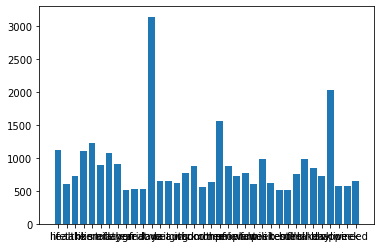

In [42]:
plt.bar(mpw,[tokens.count(i) for i in mpw])